In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Overview the Data Set

64


(-0.5, 63.5, 63.5, -0.5)

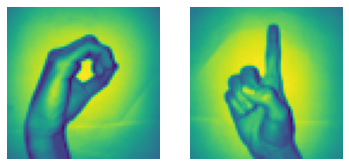

In [105]:
# data load
x_1 = np.load('X.npy')
y_1 = np.load('Y.npy')
img_size = 64
print(len(x_1[260]))
plt.subplot(1, 2, 1)
plt.imshow(x_1[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_1[900].reshape(img_size, img_size))
plt.axis('off')

In [106]:

x_1[204:409] # 괄호 3개 3차원


array([[[0.43529412, 0.44705883, 0.4509804 , ..., 0.41568628,
         0.40392157, 0.39215687],
        [0.44705883, 0.45882353, 0.4627451 , ..., 0.42745098,
         0.41960785, 0.40392157],
        [0.45490196, 0.46666667, 0.47843137, ..., 0.4392157 ,
         0.43529412, 0.42352942],
        ...,
        [0.58431375, 0.6039216 , 0.62352943, ..., 0.5372549 ,
         0.52156866, 0.5058824 ],
        [0.5411765 , 0.5568628 , 0.57254905, ..., 0.5254902 ,
         0.5137255 , 0.5019608 ],
        [0.5176471 , 0.5372549 , 0.5529412 , ..., 0.5176471 ,
         0.5058824 , 0.49411765]],

       [[0.5137255 , 0.5254902 , 0.53333336, ..., 0.46666667,
         0.45882353, 0.4509804 ],
        [0.5254902 , 0.5372549 , 0.54509807, ..., 0.4745098 ,
         0.47058824, 0.45882353],
        [0.53333336, 0.54509807, 0.5529412 , ..., 0.48235294,
         0.4745098 , 0.4627451 ],
        ...,
        [0.47843137, 0.4862745 , 0.4862745 , ..., 0.41568628,
         0.40784314, 0.4       ],
        [0.4

In [107]:
# 딥러닝 지도학습을 위한 데이터 전처리

X = np.concatenate((x_1[204:409], x_1[822:1027] ), axis = 0)
print(X)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis = 0).reshape(X.shape[0], 1)
print("X shape:", X.shape)
print("Y shape:", Y.shape)

[[[0.43529412 0.44705883 0.4509804  ... 0.41568628 0.40392157 0.39215687]
  [0.44705883 0.45882353 0.4627451  ... 0.42745098 0.41960785 0.40392157]
  [0.45490196 0.46666667 0.47843137 ... 0.4392157  0.43529412 0.42352942]
  ...
  [0.58431375 0.6039216  0.62352943 ... 0.5372549  0.52156866 0.5058824 ]
  [0.5411765  0.5568628  0.57254905 ... 0.5254902  0.5137255  0.5019608 ]
  [0.5176471  0.5372549  0.5529412  ... 0.5176471  0.5058824  0.49411765]]

 [[0.5137255  0.5254902  0.53333336 ... 0.46666667 0.45882353 0.4509804 ]
  [0.5254902  0.5372549  0.54509807 ... 0.4745098  0.47058824 0.45882353]
  [0.53333336 0.54509807 0.5529412  ... 0.48235294 0.4745098  0.4627451 ]
  ...
  [0.47843137 0.4862745  0.4862745  ... 0.41568628 0.40784314 0.4       ]
  [0.46666667 0.46666667 0.45882353 ... 0.40392157 0.39607844 0.3882353 ]
  [0.4509804  0.44705883 0.4392157  ... 0.39607844 0.3882353  0.3764706 ]]

 [[0.81960785 0.827451   0.83137256 ... 0.84313726 0.83137256 0.81960785]
  [0.827451   0.827451

In [108]:
# train, test set 만들기
from sklearn.model_selection import train_test_split

X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print(number_of_train, number_of_test)


348 62


In [109]:
# 차원을 변경
X_train_flattern = X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flattern = X_test.reshape(number_of_test, X_test.shape[1]*X_test.shape[2])

print(X_train_flattern.shape, X_test_flattern.shape)

(348, 4096) (62, 4096)


In [110]:
# 행렬을 전치
x_train = X_train_flattern.T
x_test = X_test_flattern.T
y_train = Y_train.T
y_test = Y_test.T

## logistic Regression
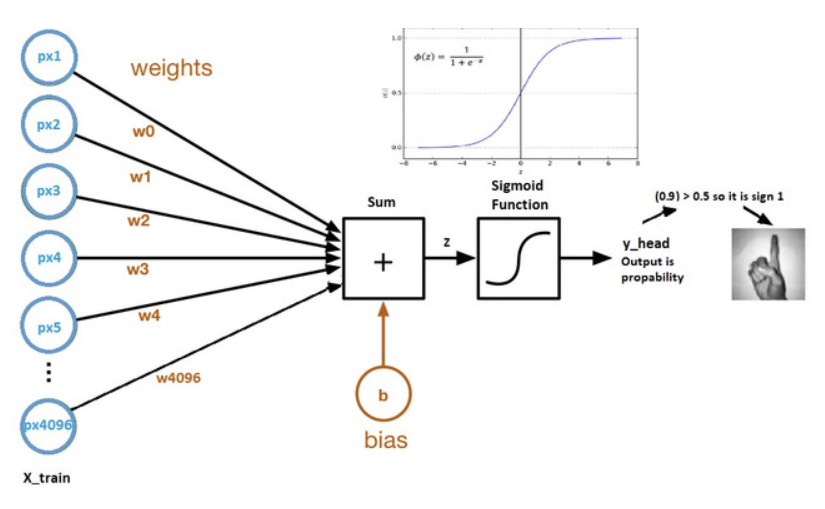

In [111]:
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)

def initialize_weight_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b

w, b = initialize_weight_and_bias(4096)

In [112]:
def sigmoid(z):
    y_head = 1/(1+np.e**(-z))
    return y_head

In [113]:
sigmoid(100)

1.0

In [114]:
def forward_progation(w, b, X_train, y_train):
    z = np.dot(w.T, x_train)+b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = np.sum(loss)/x_train.shape[1]
    return cost

In [115]:
w, b = initialize_weight_and_bias(4096)
cost = forward_progation(w, b, x_train, y_train)
print(cost)

14.014222401929988


## gradient descent

In [125]:
def forward_backward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train)+b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = np.sum(loss)/x_train.shape[1]
    
    # backward propagtion
    derivate_weight = np.dot(x_train, ((y_head-y_train).T))/x_train.shape[1]
    derivate_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight":derivate_weight, "derivative_bias":derivate_bias}
    return cost, gradients

In [117]:
w, b = initialize_weight_and_bias(4096)
forward_backward_propagation(w, b, x_train, y_train)

(14.014222401929988,
 {'derivative_weight': array([[0.26381565],
         [0.2691909 ],
         [0.27409286],
         ...,
         [0.24135678],
         [0.23780708],
         [0.23305161]]),
  'derivative_bias': 0.4942528735619787})

In [118]:
w, b = initialize_weight_and_bias(4096)
cost, derivate_dict = forward_backward_propagation(w, b, x_train, y_train)
print(derivate_dict['derivative_weight'])

[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]


In [119]:
w = derivate_dict['derivative_weight']
b = derivate_dict['derivative_bias']
print(w,b)
cost, derivate_dict = forward_backward_propagation(w, b, x_train, y_train)
# print(derivate_dict['derivate_weight'])
print(cost)

[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]] 0.4942528735619787
nan


In [149]:
def forward_backward_propagation(w ,b ,x_train, y_train):
    z = np.dot(w.T , x_train)+b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = np.sum(loss)/x_train.shape[1]
    print(cost)
    #backward propagation
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    print(derivative_weight)
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight":derivative_weight, "derivative_bias":derivative_bias }
    return cost , gradients

In [150]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
Cost after iteration 0: nan
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]


[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
Cost after iteration 100: nan
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [

[[0.22167609]
 [0.2261882 ]
 [0.2302628 ]
 ...
 [0.20006662]
 [0.19724597]
 [0.1934396 ]]
1.0311069765689425
[[-0.216672  ]
 [-0.22075055]
 [-0.22454474]
 ...
 [-0.19564631]
 [-0.19226601]
 [-0.18827047]]
1.1242085941001165
[[0.21808178]
 [0.22252037]
 [0.22652348]
 ...
 [0.1965856 ]
 [0.19382694]
 [0.19009628]]
0.9965618458133885
[[-0.21260544]
 [-0.21661607]
 [-0.22034439]
 ...
 [-0.19213599]
 [-0.18880854]
 [-0.18487717]]
Cost after iteration 190: 0.996562
1.080817423206126
[[0.21420964]
 [0.21856894]
 [0.22249493]
 ...
 [0.19284789]
 [0.19015567]
 [0.18650563]]
0.9612622141760793
[[-0.20823447]
 [-0.21217168]
 [-0.21582897]
 ...
 [-0.18835931]
 [-0.18508892]
 [-0.1812268 ]]
1.0366977480356383
[[0.21003966]
 [0.2143135 ]
 [0.2181564 ]
 ...
 [0.18883651]
 [0.18621539]
 [0.18265116]]
0.9252032365012202
[[-0.20354019]
 [-0.20739805]
 [-0.21097877]
 ...
 [-0.184299  ]
 [-0.18109018]
 [-0.17730278]]
0.9918705679480075
[[0.2055502 ]
 [0.20973196]
 [0.21348541]
 ...
 [0.18453312]
 [0.18198

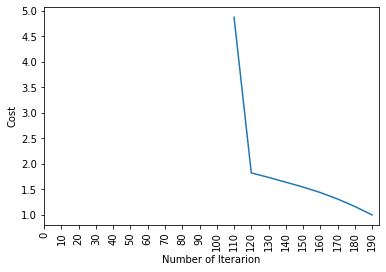

In [151]:
parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

In [131]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

In [132]:
predict(parameters["weight"],parameters["bias"],x_test)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [141]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weight_and_bias(dimension) 
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


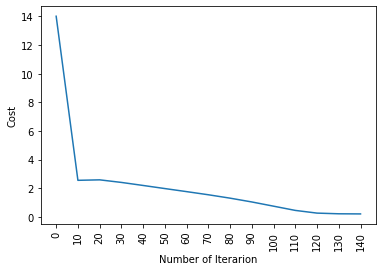

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [142]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

In [148]:
# sklearn 이용
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


In [152]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [153]:
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [154]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [155]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):
    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [156]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    return parameters

In [157]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

Cost after iteration 0: 0.389271
Cost after iteration 100: 0.362531
Cost after iteration 200: 0.353288
Cost after iteration 300: 0.350149
Cost after iteration 400: 0.342885
Cost after iteration 500: 0.335370
Cost after iteration 600: 0.318192
Cost after iteration 700: 0.290725
Cost after iteration 800: 0.255090
Cost after iteration 900: 0.216852
Cost after iteration 1000: 0.183039
Cost after iteration 1100: 0.279574
Cost after iteration 1200: 0.150172
Cost after iteration 1300: 0.120545
Cost after iteration 1400: 0.130539
Cost after iteration 1500: 0.094960
Cost after iteration 1600: 0.084836
Cost after iteration 1700: 0.076454
Cost after iteration 1800: 0.069251
Cost after iteration 1900: 0.062976
Cost after iteration 2000: 0.057490
Cost after iteration 2100: 0.052603
Cost after iteration 2200: 0.048059
Cost after iteration 2300: 0.043812
Cost after iteration 2400: 0.040181


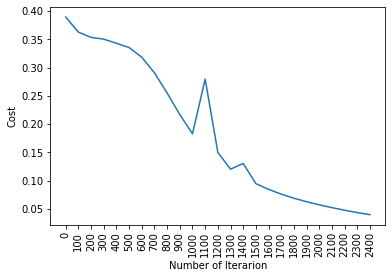

train accuracy: 100.0 %
test accuracy: 93.54838709677419 %


In [158]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

In [160]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.4743
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5092
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5453
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5497
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4965
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5598
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5575
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5499
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5400
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5521
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5358
Epoch 85/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4964
Epoch 86/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5075
Epoch 87/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5383
Epoch 88/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5427
Epoch 89/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5754
Epoch 90/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5469
Epoch 91/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5204
Epoch 92/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.5668
Epoch 93/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5610
Epoch 94/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.2211 - accuracy: 0.9826
Epoch 67/100
8/8 [==============================] - 0s 1ms/step - loss: 0.2152 - accuracy: 0.9781
Epoch 68/100
8/8 [==============================] - 0s 1ms/step - loss: 0.1971 - accuracy: 0.9812
Epoch 69/100
8/8 [==============================] - 0s 1ms/step - loss: 0.1979 - accuracy: 0.9801
Epoch 70/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2007 - accuracy: 0.9681
Epoch 71/100
8/8 [==============================] - 0s 1ms/step - loss: 0.1936 - accuracy: 0.9837
Epoch 72/100
8/8 [==============================] - 0s 1ms/step - loss: 0.1779 - accuracy: 0.9889
Epoch 73/100
8/8 [==============================] - 0s 1ms/step - loss: 0.1920 - accuracy: 0.9836
Epoch 74/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9873
Epoch 75/100
8/8 [==============================] - 0s 1ms/step - loss: 0.1747 - accuracy: 0.9860
Epoch 76/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.3291 - accuracy: 0.9834
Epoch 49/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3236 - accuracy: 0.9533
Epoch 50/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3155 - accuracy: 0.9629
Epoch 51/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3465 - accuracy: 0.9129
Epoch 52/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.9622
Epoch 53/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3092 - accuracy: 0.9436
Epoch 54/100
8/8 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.9724
Epoch 55/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3308 - accuracy: 0.9686
Epoch 56/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3014 - accuracy: 0.9496
Epoch 57/100
8/8 [==============================] - 0s 1ms/step - loss: 0.2966 - accuracy: 0.9860
Epoch 58/100
8/8 [===============